# A Naive Prediction of the Future

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# Plot data with train/test split 

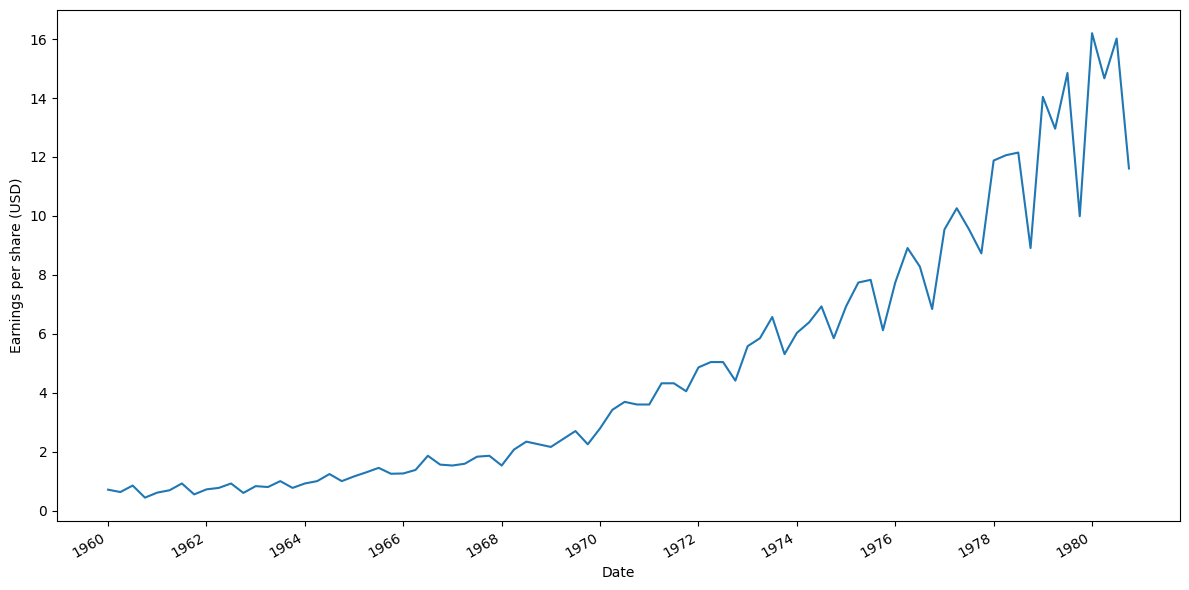

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH01_F01_peixeiro.png', dpi=300)

# Split to train/test 

In [8]:
train = df[:-4]  # Select all rows from the dataframe df except for the last 4 rows, used for training data
test = df[-4:]   # Select the last 4 rows from the dataframe df, used for testing data

train.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


# Predict historical mean 

In [10]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [11]:
# Assign the value of 'historical_mean' to the 'pred_mean' column for the 'test' dataframe
test.loc[:, 'pred_mean'] = historical_mean  

test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


### Mean Absolute Percentage Error (MAPE)

The **Mean Absolute Percentage Error (MAPE)** is a commonly used metric for evaluating forecasting accuracy. It is defined as the average of the absolute percentage errors between the observed values and the predicted values. The formula for MAPE is:

$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100
$$

Where:
- $ y_i $ is the actual value (observed value) for the \( i \)-th data point,
- $ \hat{y_i} $ is the forecasted value for the \( i \)-th data point,
- $ n $ is the total number of data points.

### Steps to Calculate MAPE

1. **Calculate the Historical Mean**: Compute the historical mean of the training set (`train`). This mean will be used as the forecast for the test set.
   
   $$ \text{Historical Mean} = \frac{1}{n_{\text{train}}} \sum_{i=1}^{n_{\text{train}}} y_i $$

2. **Apply the Forecast**: Use this historical mean as the forecast for the test set (`test`).

3. **Calculate MAPE**: Compare the actual values (`test['data']`) with the forecasted values (`test['pred_mean']`) and compute the Mean Absolute Percentage Error.

The formula for MAPE can be written as:

$$
MAPE = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100
$$

Where:
- $ y_i $ is the actual value in the test set,
- $ \hat{y_i} $ is the forecasted value (which is the historical mean in our case),
- $ n_{\text{test}} $ is the total number of data points in the test set.

### Python Implementation

```python
# Calculate historical mean from the training set
historical_mean = train['data'].mean()

# Apply the historical mean as the forecast for the test set
test['pred_mean'] = historical_mean

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (abs(test['data'] - test['pred_mean']) / test['data']).mean() * 100

# Output the MAPE
print(f'MAPE: {mape:.2f}%')


In [13]:
# Calculate historical mean from the training set
historical_mean = train['data'].mean()

# Apply the historical mean as the forecast for the test set
test['pred_mean'] = historical_mean

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = (abs(test['data'] - test['pred_mean']) / test['data']).mean() * 100

# Output the MAPE
print(f'MAPE: {mape:.2f}%')

MAPE: 70.01%


Another way:

In [15]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

This means that our baseline deviates
by 70% on average from the observed quarterly EPS of Johnson & Johnson in 1980.

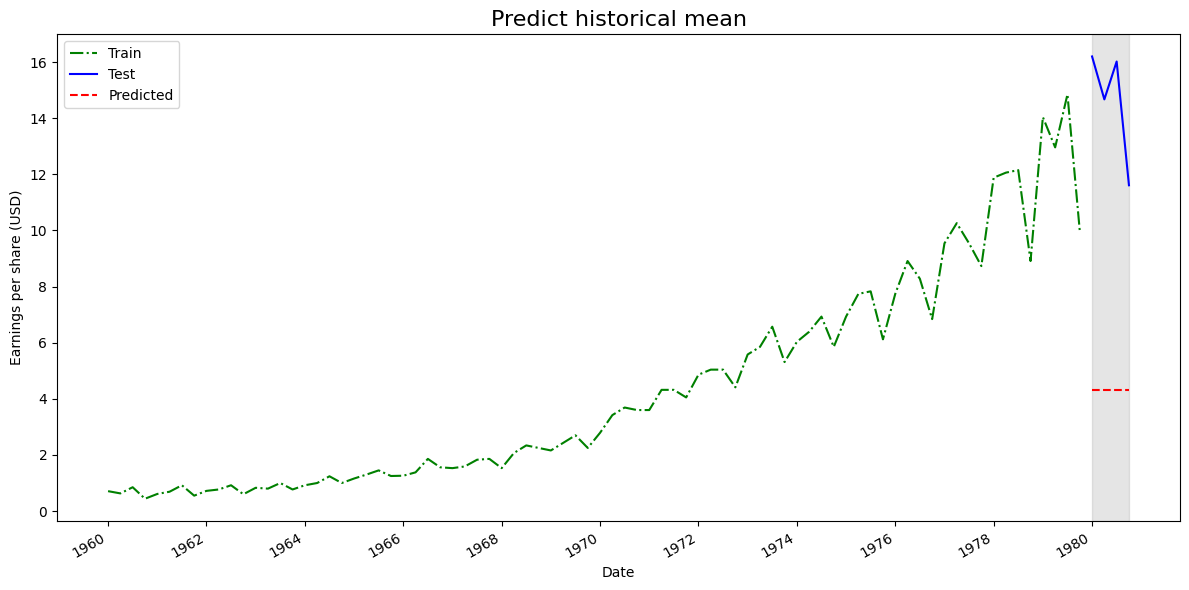

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train['date'], train['data'], 'g-.', label='Train')         # Train
ax.plot(test['date'], test['data'], 'b-', label='Test')             # Test
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')  # Predicted
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)                      # Gray Shadow
ax.legend(loc=2)
ax.set_title('Predict historical mean', fontsize=16) 

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)

# Predict last year mean 

In [20]:
# Take the mean from the last 4 values in train['data']
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

12.96

In [21]:
# Assign the calculated 'last_year_mean' as predictions for the 'pred__last_yr_mean' column in the test dataframe
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,date,data,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [22]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

This means that our baseline deviates by 15.6% on average from the observed quarterly EPS of Johnson & Johnson in 1980.

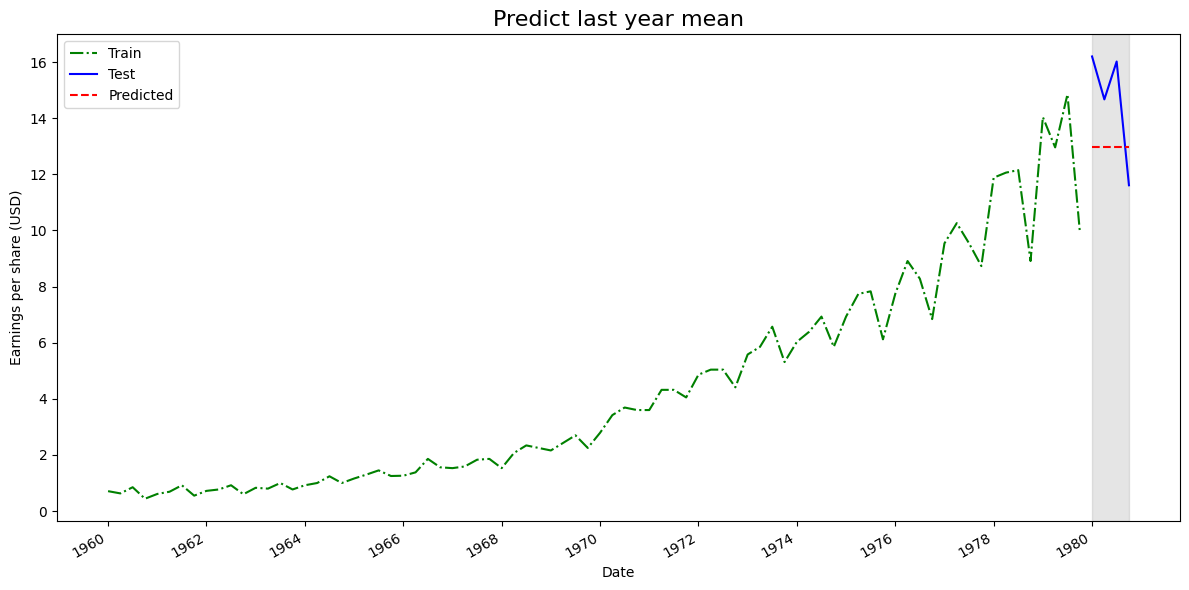

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_title('Predict last year mean', fontsize=16) 

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

# plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)

# Predict last know value 

In [26]:
last = train['data'].iloc[-1]
last

9.99

In [27]:
test.loc[:, 'pred_last'] = last

test

,date,data,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [28]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

30.457277908606535

This means that our baseline deviates by 30.5% on average from the observed quarterly EPS of Johnson & Johnson in 1980.

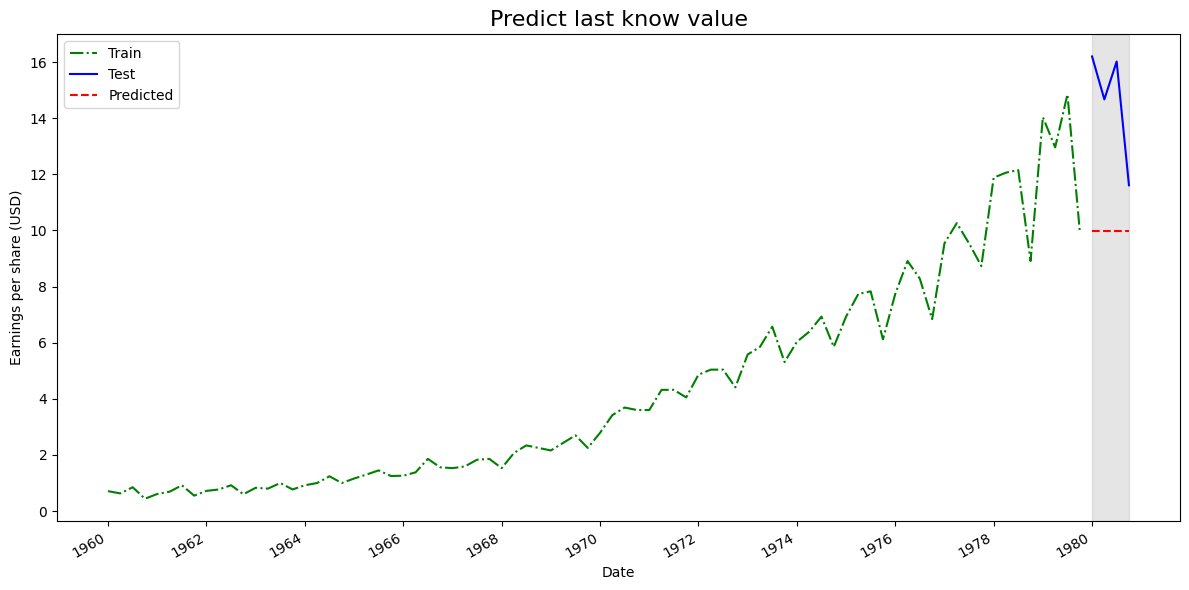

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_title('Predict last know value', fontsize=16) 

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

# Naive seasonal forecast 

The naive seasonal forecast takes the last observed cycle and repeats it into the future.
In our case, a full cycle occurs in four quarters. Our predictions are the last four values of our train set, which correspond to the quarters of 1979.

In [33]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

test

,date,data,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [34]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

This gives us a MAPE of 11.56%, which is the lowest MAPE from all the baselines in
this chapter.

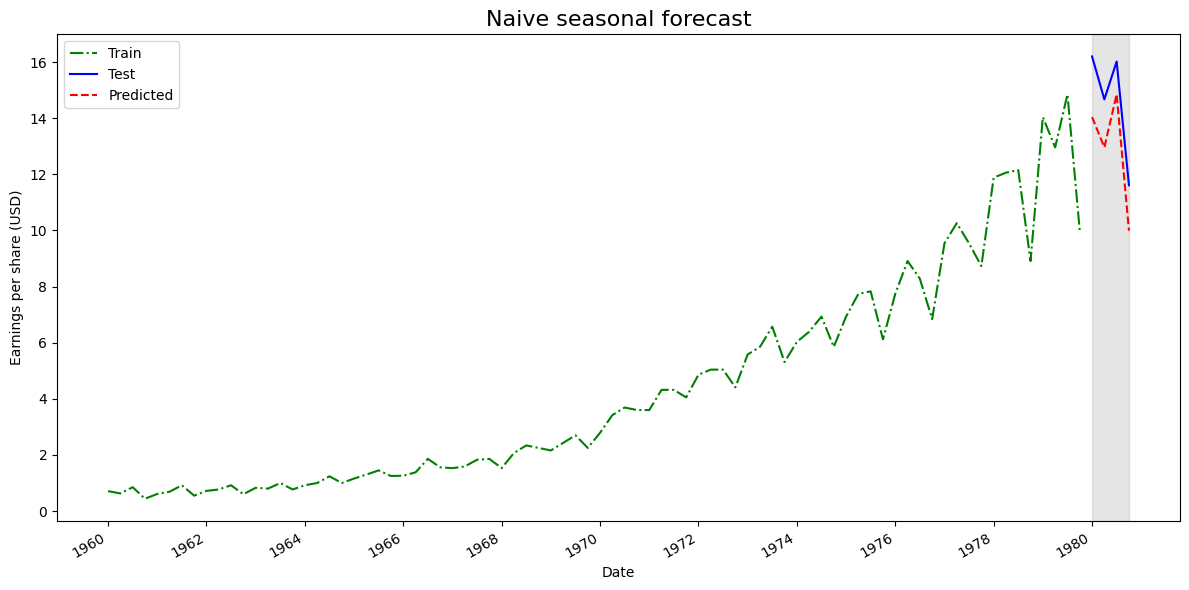

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_title('Naive seasonal forecast', fontsize=16) 

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

#plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)

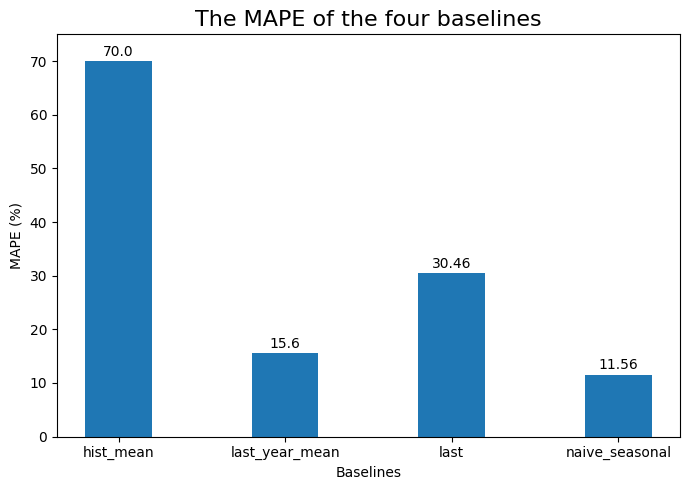

In [37]:
fig, ax = plt.subplots(figsize=(7, 5))

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)
ax.set_title('The MAPE of the four baselines', fontsize=16) 

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

#plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)